In [1]:
import sys
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install sklearn


In [12]:
# Import libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn import tree
from zlib import crc32
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeRegressor

In [4]:
# Conversion functions
def bytes_to_float(b):
    return float(crc32(b) & 0xffffffff) / 2**32

def str_to_float(s, encoding="utf-8"):
    return bytes_to_float(s.encode(encoding))

def hexstr_to_float(hex):
    if hex == "nan":
        return -1
    return float(int(hex, 16))

def int_to_float(i):
    if i == "nan":
        return -1
    return float(i)

In [5]:
# Features
feature_cols = ["UserName","LogHost","DomainName","Status","Source","AuthenticationPackage","Time","LogonID","ParentProcessName","ParentProcessID","ProcessName","ProcessID","LogonTypeDescription","LogonType","FailureReason","Destination"]
str_cols = ["UserName", "LogHost", "DomainName", "Source", "AuthenticationPackage","ParentProcessName","ProcessName","LogonTypeDescription","FailureReason","Destination"]
int_cols = ["Time", "LogonType"]
hex_cols = ["Status", "LogonID", "ProcessID", "ParentProcessID"]

In [6]:
# I tried to convert strings to unique float values
# "nan" values to -1 or something that wont be used by other fields
# hex values to their float representations
def build_data(data):
    for col in str_cols:
        data[col] = data[col].apply(lambda x: str_to_float(str(x)))
    for col in int_cols:
        data[col] = data[col].apply(lambda x: int_to_float(str(x)))
    for col in hex_cols:
        data[col] = data[col].apply(lambda x: hexstr_to_float(str(x)))    
            
def dataset(csv_path):
    data = pd.read_csv(csv_path)
    build_data(data)
    X = data[feature_cols]
    y = data.EventID
    return X, y

In [7]:
# Read data
X_train, y_train = dataset("train.csv")
X_val, y_val = dataset("val.csv")
X_test, y_test = dataset("test.csv")

In [8]:
# Build and train model
# I used decision tree for the classifier as it seemed the 
# best fit for the data format
clf = DecisionTreeClassifier()
model = clf.fit(X_train,y_train)

In [9]:
# Test
y_pred = clf.predict(X_test)

In [10]:
# Assess performance
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9314779675310985


In [20]:
text_representation = tree.export_text(clf)
with open("clf.txt", "w") as text_file:
    text_file.write(text_representation)

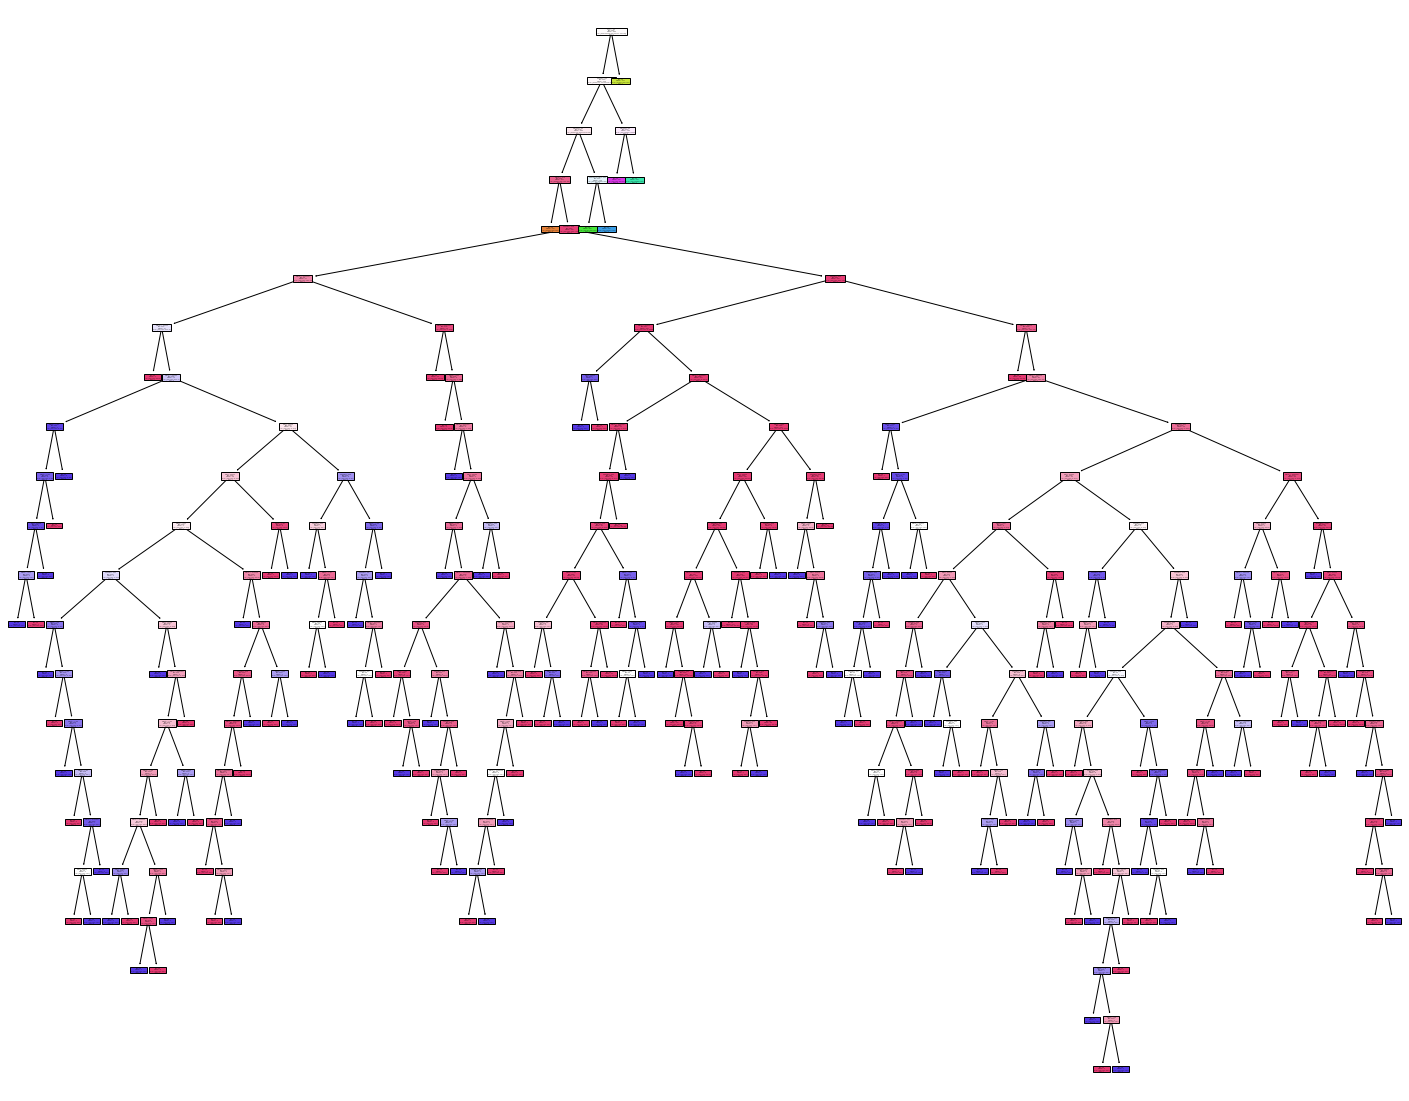

In [11]:
# Additional code
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=feature_cols,
                   class_names=['0','1','2','3','4','5','6','7'],
                   filled=True)
fig.savefig("decistion_tree.png")

In [16]:
regr = DecisionTreeRegressor(max_depth=10, random_state=1234)
model = regr.fit(X_train, y_train)

In [18]:
text_representation = tree.export_text(regr)
with open("regresor.txt", "w") as text_file:
    text_file.write(text_representation)

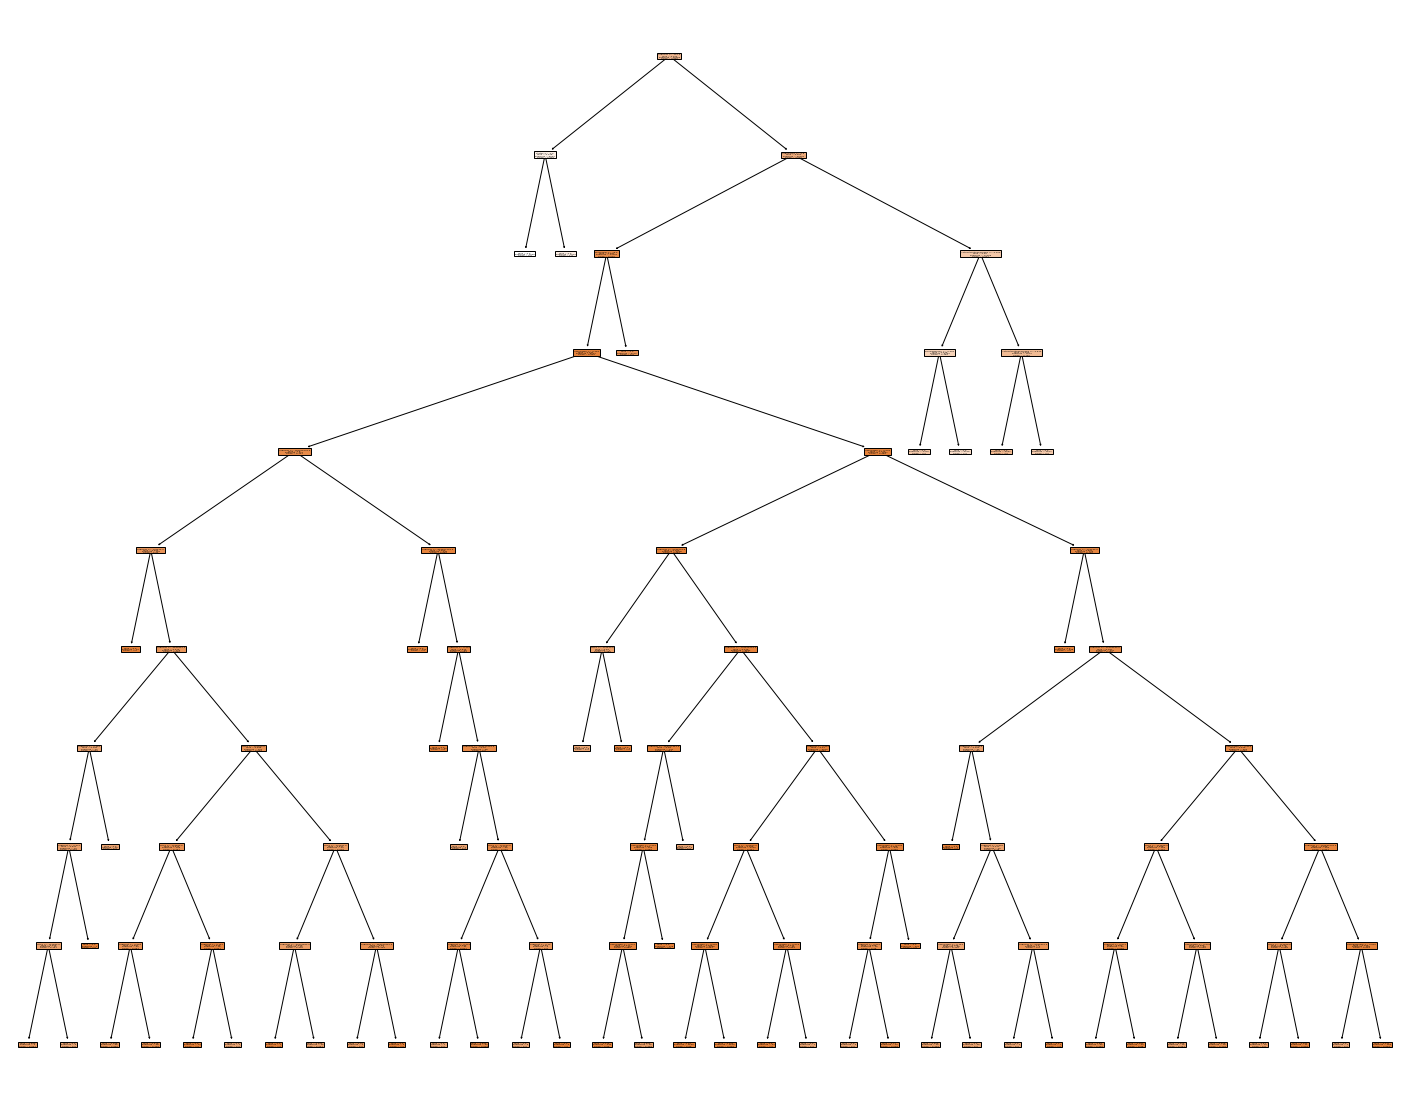

In [19]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(regr, feature_names=feature_cols, filled=True)